In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# 从模型到产品

我们在第一章看到的六行代码只是在实践中应用深度学习过程的小部分。在本章中，我们将使用计算机视觉示例学习端到端创建深度学习应用过程。更确切地说，我们要建立一个熊的分类器！在此过程中，我们将讨论深度学习的能力和限制，探索如何创建数据集，看看在实践中使用深度学习时可能出现的问题等。许多关键点同样适用于其他深度学习问题，例如第一章中的那些。如果您所解决问题的主要方面与我们的示例类似，我们希望您能用很少的代码快速获得出色的结果。

让我们从如何提出你的问题开始。

## 深度学习实践

我们已经看到，深度学习只需要很少的代码就可以快速解决许多具有挑战性的问题。作为一个初学者，存在的问题与我们的示例问题非常相似，您可以快速获得非常有用的结果。然而，深度学习不是魔法！同样的六行代码并不适用于现在任何人能够想到的所有问题。低估深度学习的限制和高估其能力可能会导致令人沮丧的结果，至少在你获得一些经验并能够解决出现的问题之前是如此。反之，过高估计深度学习的限制又过低估计其能力可能意味着你不会去尝试一个能够解决的问题，因为你说服自己放弃它。

我们经常与那些低估深度学习的限制和能力的人交谈。有这两个问题：低估能力意味着你甚至可能不会尝试那些非常有益的事情，而低估限制可能意味着您无法考虑重要问题并对其做出反应。 

最好的办法是保持开放的心态。如果你对深度学习用比预期更少的数据或复杂度解决你部分问题的可能性持开放态度，那就可以设计一个过程，通过这个过程你可以找到与您的特定问题相关的能力和约束。这并不意味着要下任何冒险赌注 —— 我们将向您展示如何逐步推出模型，使其不会产生重大风险，甚至可以在将其投入量产之前对其进行回溯测试。


### 启动您的项目

应该从哪里开始您的深度学习之旅呢？最重要的是确保你有使用深度学习的项目 —— 只有通过完成自己的项目，您才可能获得构建和实用模型的实际经验。在选择项目时，最重要的考虑因素是数据的有效性。不管您做项目是为了自己的学习还是在组织中实际应用，您都希望能够快速开始。我们见过太多学生、研究人员和工业界从业者在试图找到完美数据集时浪费了数月或数年的时间。目标不是找到“完美”的数据集或项目，而是立刻开始和迭代。 

如果采取本方法，当完美主义者还在计划阶段的时候，您都已经在进行第三轮学习和改进的迭代了。

我们还建议您在项目中从头到尾进行迭代。不要花几个月的时间来微调你的模型，或者打磨完美的图形用户界面，或者标记完美的数据集... 相反，在合理的时间内尽可能完成每一步，一直到最后。例如，如果您的最终目标是运行在手机上的应用程序，那么应该是您每个迭代后得到的成果。但也许在早期迭代时您走了很多捷径，例如，在远程服务器上做所有处理，并使用简单的响应式 Web 应用程序。通过从头到尾地完成项目，您将看到最棘手的部分在哪里，以及哪些部分对最终结果的影响最大。


在你学习本书时，我们建议您完成这些小实验，运行和调整我们提供的 notebook，同时您可以逐步开发自己的项目。采用这种方式，您将获得我们所讲解的工具和技术的经验。

> 西尔万：为了充分利用这本书，在您自己的项目上或研究我们提供的notebook，在开始下个章节之前请花时间做实验。然后尝试在新的数据集上从头开始重写这些notebook。只有通过大量的练习（和失败），才能培养出如何训练模型的直觉。

通过使用全流程迭代方法，您还会更好地了解您真正需要多少数据。例如，您可能会发现只能轻松获得200个被标注的数据，在尝试实现之前，您无法真正知道实践中这是否满足应用程序良好运行所需的性能。

在组织背景中，您将能够通过向同事展示真实的工作原型来证实您的想法是可行的。我们反复观察到，这是项目获得组织的良好认同的秘诀。


已经有可用数据的项目是最容易开始的，这表示开始一个与你已经在做的事情相关的项目可能是最容易的，因为你已经有了相关的数据。例如，如果你在音乐行业工作，你可能会接触到许多录音。如果你是一名放射科医生，你可能会接触到大量的医学图像。如果你对野生动物保护感兴趣，你可能会接触到很多野生动物的图片。

有时候你得有些创意。也许可以找先前与您感兴趣领域相关的机器学习项目，比如Kaggle竞赛。有时候你必须妥协。也许找不到恰好是您心目中项目所需的精确数据；但也许可以从类似的领域找，或者以不同的方式度量，处理稍微不同的问题。处理这些类似项目仍然可以让您很好地理解整个过程，并且可以帮助您识别其他捷径、数据源，等等。

尤其当您刚刚入门深度学习的时候，把它扩展到不同的领域，深度学习以前没有应用过的地方，并不是一个好主意。这是因为在一开始如果模型不起作用，您不知道这是因为你犯的错误，还是您试图解决的问题根本不是通过深度学习可以解决的。并且您也不知道去哪里寻求帮助。因此，一个好的开端是，首先在网上找一个与您尝试要完成的项目差不多类似的的例子，并且有人已经取得了很好的结果。或者您可以将您的数据转换为别人曾经使用过的类似格式（例如从您的数据创建图像）。让我们来看看深度学习的现状，只是为了让你知道现今深度学习擅长什么样的事情。 

### 深度学习现状

让我们先来考虑一下深度学习是否能很好地处理你想要解决的问题。本节总结了2020年初深度学习的现状。然而，由于发展得太快了，当你读到这篇文章时，其中一些限制可能已不复存在。我们会努力使[该书的网站](https://book.fast.ai/)内容保持最新。此外，在搜索引擎网站搜索“人工智能现在能做什么”很可能会获取当前的信息。

#### 计算机视觉

在许多领域，深度学习尚未被应用于图像分析，但在那些已经尝试过的领域中，几乎普遍表明计算机至少能像人类一样——甚至像放射科医生等受过专门训练的人员一样——出色地识别图像中的物体。这一技术被称为**目标识别**。深度学习还擅长确定图像中物体的位置，能够标记出它们的位置并为每个识别到的物体命名，这被称为**目标检测**（在《第一章节》中我们还提到过它的一个变体：根据每个像素所属的物体类型对其进行分类，这被称为**图像分割**）。

不过，深度学习算法通常不擅长识别那些在结构或风格上与训练模型所用图像存在显著差异的图像。例如，如果训练数据中没有黑白图像，模型在处理黑白图像时可能表现不佳；同样，如果训练数据中不包含手绘图像，模型在处理手绘图像时很可能也会效果糟糕。目前尚无通用方法来检查训练集中缺少哪些类型的图像，但在本章中，我们会介绍一些方法，用于在模型投入实际应用时，识别数据中出现的意外图像类型（这被称为检查**域外数据**）。

目标检测系统面临的一个主要挑战是，图像标注工作既耗时又昂贵。目前，大量研究正致力于开发相关工具，以期加快标注速度、简化标注流程，并减少训练精准目标检测模型所需的手工标注量。其中一种特别有效的方法是对输入图像进行合成变异处理，例如旋转图像、调整亮度和对比度等，这被称为**数据增强**，该方法在文本及其他类型的模型中同样效果显著。本章将对其进行详细探讨。

另一点需要考虑的是，尽管你的问题可能看起来不像计算机视觉问题，但稍加变通或许就能将其转化为一个计算机视觉问题。例如，如果你想要分类的是声音，不妨尝试将声音转换为声波图像，然后基于这些图像训练模型。

#### 文本（自然语言处理）

计算机在对长短文档进行分类方面表现出色，分类依据可以是否垃圾邮件、情感倾向（例如，评论是正面还是负面）、作者身份、来源网站等。根据该领域的研究其能力已经远超人类。

深度学习还非常擅长生成符合语境的文本，比如社交媒体帖子的回复，以及模仿特定作者的风格。它生成的内容对人类也极具吸引力——事实上，有时甚至比人类创作的文本更吸引人。然而，深度学习目前并不擅长生成**准确无误**的回复！例如，我们尚无可靠的方法将医疗信息知识库与深度学习模型结合起来，以生成医学上正确的自然语言回复。这存在极大的风险，因为它很容易生成一些外行人看来颇具说服力，实则完全错误的内容。

另一个令人担忧的问题是，社交媒体上那些符合语境且极具吸引力的回复可能会被大规模滥用——其规模可能是以往任何“网络水军”的数千倍——用于传播虚假信息、制造动荡并煽动冲突。根据经验来看，文本生成模型在技术上总会比自动识别生成文本的模型领先一步。例如，人们可以利用一个能够识别人工生成内容的模型来改进生成此类内容的生成器，直到分类模型无法再完成其识别任务。

尽管存在这些问题，深度学习在自然语言处理（NLP）领域仍有诸多应用：它可以用于将文本从一种语言翻译成另一种语言、将长篇文档总结成更易于快速理解的内容、找出所有提及某一相关概念的地方等等。遗憾的是，翻译或总结的内容很可能包含完全错误的信息！不过，其性能已经足够出色，许多人正在使用这些系统——例如，谷歌的在线翻译系统（以及我们所知的其他所有在线翻译服务）都是基于深度学习构建的。

#### 图文组合

深度学习将文本与图像整合到单一模型中的能力，通常远超大多数人的直观预期。例如，我们可以训练一个深度学习模型，使其以输入图像为依据，输出对应的描述，而该模型也能够为新图像自动生成出人意料的贴切描述！但这里仍要重申上一节提到的警告：这些描述并不能保证完全准确。

鉴于这一严重问题，我们通常建议不要将深度学习作为一个完全自动化的流程来使用，而应将其作为模型与人类用户紧密互动的流程的一部分。这有可能使人类的工作效率比纯手动方式高出数个数量级，并且实际上能带来比仅依靠人类完成流程更准确的结果。举例来说，自动系统可以直接从CT扫描图像中识别出潜在的中风患者，并发出高优先级警报，以便这些扫描图像能得到快速查看。治疗中风的窗口期仅有三小时，因此这种快速的反馈循环可能会挽救生命。同时，所有扫描图像仍可以按常规方式发送给放射科医生，这样就不会减少人类的参与。其他深度学习模型则可以自动测量扫描图像中看到的物品，将这些测量结果填入报告，提醒放射科医生可能遗漏的发现，并告知他们其他可能相关的病例。

#### 表格数据

在时间序列和表格数据分析领域，深度学习近年来取得了显著进展。不过，深度学习通常是作为多种类型模型集成方法的一部分来使用的。如果你已经有一个基于随机森林或梯度提升机（这是两种你即将学到的主流表格建模工具）的系统，那么转而使用深度学习或在现有系统中加入深度学习，可能不会带来显著的性能提升。

深度学习的一大优势是能极大扩展可纳入分析的列类型范围——例如，包含自然语言的列（如书名、评论等），以及高基数分类列（即包含大量离散选项的列，如邮政编码、产品ID等）。但它也有缺点：深度学习模型的训练时间通常比随机森林或梯度提升机长，不过这一情况正随着相关库的发展而改变，例如[RAPIDS](https://rapids.ai/)库就为整个建模流程提供了GPU加速。关于这些方法的优缺点，我们会在《第九章》中详细探讨。

#### 推荐系统

推荐系统实际上只是表格数据的一种特殊形式。具体来说，推荐系统通常包含一个代表用户的高基数分类变量，以及另一个代表产品（或类似事物）的高基数分类变量。像亚马逊这样的公司，会将客户的所有购买记录表示为一个巨大的稀疏矩阵，其中行代表客户，列代表产品。数据以这种格式呈现后，数据科学家会采用某种协同过滤方法来“填充矩阵”。例如，如果客户A购买了产品1和产品10，而客户B购买了产品1、2、4和10，那么推荐引擎就会建议客户A购买产品2和4。由于深度学习模型擅长处理高基数分类变量，因此它们在处理推荐系统方面表现相当出色。与处理表格数据时一样，当将这些变量与其他类型的数据（如自然语言或图像）相结合时，深度学习的优势会尤为突出。它们还能很好地将所有这些类型的信息与以表格形式呈现的额外元数据（如用户信息、历史交易记录等）整合起来。

然而，几乎所有机器学习方法都存在一个缺点：它们只能告诉你特定用户可能喜欢哪些产品，却无法判断哪些推荐对用户真正有用。很多针对用户可能喜欢的产品的推荐可能毫无帮助——例如，用户已经熟悉这些产品，或者这些产品只是他们已购产品的不同包装（比如，用户已经拥有某套小说中的每一本，却收到了该小说套装的推荐）。杰里米喜欢读特里·普拉切特的书，有一段时间，亚马逊给他推荐的全是特里·普拉切特的书（下图所求），这其实毫无帮助，因为他早就知道这些书了！

<img alt="Terry Pratchett books recommendation" caption="A not-so-useful recommendation" id="pratchett" src="images/pratchett.png">

#### 其它数据类型

通常你会发现，特定领域的数据类型往往能很好地归入现有的数据类别中。例如，蛋白质链与自然语言文档十分相似，它们都是由离散符号构成的长序列，且序列中存在复杂的关联和内在含义。事实上，对于多种蛋白质分析任务而言，采用自然语言处理（NLP）领域的深度学习方法目前已是最先进的方案。再比如，声音可以用频谱图来表示，而频谱图可被当作图像处理；事实证明，针对图像的标准深度学习方法在频谱图上也能发挥出色的效果。

### 驱动链方法

有许多模型虽然准确率很高，却对任何人都毫无用处；也有不少模型准确率欠佳，实用性却极强。为确保你的建模工作能在实际中发挥作用，你需要考虑这项工作将如何被运用。2012年，杰里米与玛吉特·兹韦默、迈克·卢基德斯共同提出了一种名为“驱动链方法”的思路，专门用于思考这一问题。

如下图所示的驱动链方法，在[《设计卓越的数据产品》](https://www.oreilly.com/radar/drivetrain-approach-data-products/)一文中有详细阐述。其核心思路是，先明确你的目标，再思考为达成该目标可采取哪些行动、拥有（或可获取）哪些能提供帮助的数据，随后构建一个模型，借助该模型确定能带来最佳目标成果的最优行动方案。

<img src="images/drivetrain-approach.png" id="drivetrain" caption="The Drivetrain Approach">

试想自动驾驶汽车中的一个模型：你希望助力汽车在无需人类干预的情况下从A点安全行驶到B点。出色的预测建模是解决方案的重要组成部分，但它无法独立存在；随着产品日益复杂，建模会融入整个系统的“基础设施”中。乘坐自动驾驶汽车的人完全意识不到，有数百（甚至数千）个模型和PB级的数据在支撑它运行。但随着数据科学家打造的产品越来越复杂，他们需要一种系统化的设计方法。

我们使用数据，不只是为了生成更多数据（以预测结果的形式），更是为了产生**可付诸行动的成果**。这正是驱动链方法的目标。首先要定义一个清晰的**目标**。例如，谷歌在打造首个搜索引擎时，思考了“用户输入搜索查询的主要目的是什么？”，这促使他们确立了“展示最相关的搜索结果”这一目标。下一步是考虑可以拉动哪些**杠杆**（即可以采取哪些行动）来更好地实现该目标。对谷歌而言，这便是搜索结果的排序。第三步是思考需要哪些新**数据**来实现这样的排序；他们意识到，关于哪些页面链接到哪些其他页面的隐含信息可用于此目的。只有完成这前三个步骤后，我们才开始考虑构建预测**模型**。我们的目标、可用的杠杆、已有的数据以及需要收集的额外数据，共同决定了我们能够构建的模型。这些模型会将杠杆和所有不可控变量作为输入，而模型的输出可以结合起来，预测目标的最终状态。

再来看另一个例子：推荐系统。推荐引擎的**目标**是通过推荐那些如果没有推荐用户就不会购买的商品，给用户带来惊喜和愉悦，从而拉动额外销售。这里的**杠杆**是推荐内容的排序。要生成能**促成新销售**的推荐，就必须收集新的**数据**。这需要开展大量随机实验，以收集针对各类客户的多种推荐相关数据。这一步骤很少有机构会去执行，但如果不这样做，你就无法获得基于真实目标（即更多销售！）优化推荐所需的信息。

最后，你可以构建两个关于购买概率的**模型**，分别针对用户看到推荐和没看到推荐这两种情况。这两个概率的差值，就是针对某客户的特定推荐的效用函数。在以下两种情况下，该效用函数值会很低：一是算法推荐了用户已经拒绝过的熟悉商品（此时两个概率值都很小）；二是用户即便没有推荐也会购买该商品（此时两个概率值都很大，且相互抵消）。

由此可见，在实际操作中，模型的落地实施往往远不止训练模型这么简单！你通常需要通过实验收集更多数据，并考虑如何将模型整合到正在开发的整个系统中。说到数据，接下来我们就重点探讨如何为你的项目寻找数据。

## 收集数据

对于许多类型的项目，你或许能在网上找到所需的全部数据。本章中我们要完成的项目是一个“熊类识别器”，它能区分三种熊：灰熊、黑熊和泰迪熊。互联网上有许多这几种熊的图片可供我们使用，我们只需要一种方法来查找并下载这些图片。我们提供了一个可用于此目的的工具，这样你就能跟着本章的内容操作，为任何你感兴趣的物体创建自己的图像识别应用。在fast.ai课程中，成千上万的学生在课程论坛上展示了他们的作品，涵盖了从特立尼达的蜂鸟品种到巴拿马的公交车类型等各种内容——有个学生甚至开发了一个应用，能帮他的未婚妻在圣诞假期认出他的16个堂兄弟姐妹！

在撰写本文时，必应图片搜索是我们所知的用于查找和下载图片的最佳选择。它每月免费提供多达1000次查询，每次查询最多可下载150张图片。不过，从我们撰写本书到你阅读本书这段时间里，可能已经出现了更好的工具，所以一定要查看[本书官网](https://book.fast.ai/)，了解我们当前的推荐。

> 重要提示：及时了解最新服务动态  
>用于创建数据集的服务层出不穷，且它们的功能、接口和定价也在不断变化。在本节中，我们将介绍本书撰写时可用的必应图片搜索API的使用方法。我们会在[本书官网](https://book.fast.ai/)上提供更多选项和最新信息，因此请务必查看该网站，以获取有关如何从网络下载图片并创建深度学习数据集的最新内容。

# 清理

要使用必应图片搜索下载图片，请在[微软Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/)注册一个免费账户。你会获得一个密钥，可按如下方式将其复制并输入到单元格中（将“XXX”替换为你的密钥并执行）：

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

或者，如果你熟悉命令行操作，可以在终端中通过以下命令进行设置：

    export AZURE_SEARCH_KEY=你的密钥

然后重启Jupyter Notebook，这样就可以直接使用上面的代码行而无需修改。

设置好`key`后，你就可以使用`search_images_bing`函数了。该函数由本书提供的小型类单元。如果你不确定某个函数的定义位置，只需在单元格中输入该函数名即可查看相关信息：

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

我们已经成功下载了150张灰熊图片的URL（或者说，至少是必应图片搜索针对该搜索词返回的图片URL）。

**注意**：无法确切保证这类搜索会返回什么样的图片。搜索结果可能会随时间变化。我们至少听说过一个案例，有位社区成员在搜索结果中发现了一些令人不适的熊尸图片。你会获取到搜索引擎找到的所有相关图片。如果你是在工作场合、有孩子在场等情况下运行此操作，显示下载的图片前请务必谨慎。

我们来看其中一张：

In [ ]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [4]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

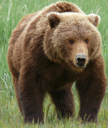

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

看来这一步效果不错，接下来我们将使用fastai的`download_images`函数，下载每个搜索词对应的所有图片URL。我们会把这些图片分别存放在不同的文件夹中：

In [5]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

> 译者：由于Microsoft Azure需要关联信用卡，才能免费获得Bing的图片搜索API接口，如不具备开通条件，可以使用下面代码直接爬取Bing搜索到的图片资源。
> ```
> from CrawlerImages import *
> 
> bear_types = 'grizzly','black','teddy'
> path = Path('bears')
> 
> crawler_images_bing(bear_types, path)
> ```
> 注：由于爬取图片速度受限于图片提供方，下载速度较慢，请耐心等待或提前学习后续内容。

正如我们预期的那样，文件夹中已经包含了图像文件：

In [ ]:
fns = get_image_files(path)
fns

(#450) [Path('bears/black/000000087.jpg'),Path('bears/black/000000129.jpg'),Path('bears/black/000000060.jpg'),Path('bears/black/000000075.jpg'),Path('bears/black/000000119.jpg'),Path('bears/black/000000051.jpg'),Path('bears/black/000000081.jpg'),Path('bears/black/000000013.jpg'),Path('bears/black/000000076.jpg'),Path('bears/black/000000047.jpg')...]

> 杰里米：我太喜欢在Jupyter笔记本里做研究的这种感觉了！一步步搭建出自己想要的东西，每一步都能检查工作成果，简直太方便了。我经常犯错，所以这种方式对我来说实在是太有用了……

从网上下载文件时，经常会出现一些损坏的文件。我们来检查一下：

In [ ]:
failed = verify_images(fns)
failed

(#6) [Path('bears/black/000000014.jpg'),Path('bears/black/000000114.jpg'),Path('bears/black/000000112.jpg'),Path('bears/black/000000090.jpg'),Path('bears/grizzly/00000138.jpg'),Path('bears/teddy/000000086.jpg')]

要移除所有损坏的图像，你可以对每个损坏的图像使用`unlink`函数。需要注意的是，与大多数返回集合的fastai函数一样，`verify_images`返回的是`L`类型的对象，该对象包含`map`方法。此方法会对集合中的每个元素调用传入的函数：

In [ ]:
failed.map(Path.unlink);

### 侧边栏：在Jupyter笔记本中获取帮助

Jupyter笔记本非常适合进行实验，能让你即时看到每个函数的运行结果，而且它还有许多实用功能，帮你弄清楚如何使用不同的函数，甚至可以直接查看函数的源代码。例如，如果你在单元格中输入：
```
??verify_images
```
会弹出一个窗口，显示：
```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```
这会告诉你该函数接受的参数（`fns`），然后展示源代码及其所在的文件。从源代码中可以看到，它会并行应用`verify_image`函数，只保留那些该函数返回结果为`False`的图像文件，这与文档字符串的描述一致：它用于查找`fns`中无法打开的图像。

以下是Jupyter笔记本中一些非常实用的其他功能：

- 在任何时候，如果你不记得函数或参数名称的准确拼写，可以按Tab键获取自动补全建议。
- 在函数的括号内，同时按下Shift和Tab键，会显示一个窗口，其中包含函数的签名和简短描述。按这两个键两次会展开文档，按三次则会在屏幕底部打开一个包含相同信息的完整窗口。
- 在单元格中，输入`?函数名`并执行，会打开一个窗口，显示函数的签名和简短描述。
- 在单元格中，输入`??函数名`并执行，会打开一个窗口，显示函数的签名、简短描述以及源代码。
- 如果你使用的是fastai库，我们为你添加了一个`doc`函数：在单元格中执行`doc(函数名)`，会打开一个窗口，其中包含函数的签名、简短描述，以及指向GitHub上源代码和[库文档](https://docs.fast.ai)中该函数完整文档的链接。
- 还有一个与文档无关但同样非常实用的功能：如果在任何时候遇到错误需要帮助，在接下来的单元格中输入`%debug`并执行，会打开[Python调试器](https://docs.python.org/3/library/pdb.html)，让你可以检查每个变量的内容。

### 边栏结束

在这一过程中，有一点需要注意：正如我们在《第一章》中所讨论的，模型只能反映用于训练它们的数据。而现实世界中充斥着带有偏见的数据，这些偏见最终会体现在（例如）必应图片搜索（我们用于创建数据集的工具）的结果中。举例来说，假设你想开发一个应用，帮助用户判断自己的皮肤是否健康，于是你基于“健康皮肤”这类搜索结果来训练模型。下图向你展示了你可能得到的搜索类型。

<img src="images/healthy_skin.gif" width="600" caption="Data for a healthy skin detector?" id="healthy_skin">

如果用这样的数据来训练模型，你最终得到的不会是一个健康皮肤识别器，而会是一个“年轻白人女性摸脸”识别器！务必仔细思考你的应用在实际场景中可能遇到的数据类型，并认真检查，确保所有这些类型在模型的源数据中都有所体现。

**脚注**：[感谢德布·拉吉提出“健康皮肤”这一示例。更多关于模型偏见的深刻见解，可参见她的论文[《可操作的审计：探究公开点名商业人工智能产品有偏见的性能结果所产生的影响》](https://dl.acm.org/doi/10.1145/3306618.3314244)。

既然我们已经下载了一些数据，接下来就需要将其整理成适合模型训练的格式。在fastai中，这意味着要创建一个名为`DataLoaders`的对象。

## 从数据到DataLoaders

`DataLoaders`是一个轻量类，仅用于存储你传入的所有DataLoader对象，并将其以训练集（train）和验证集（valid）的形式提供访问。尽管这是一个非常简单的类，但在fastai中却极为重要：它为你的模型提供数据。DataLoaders的核心功能仅通过以下四行代码实现（它还有一些次要功能，我们暂时略过）：

```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

> 术语: DataLoaders:
> 
> fastai中的一个类，用于存储你传入的多个`DataLoader`对象，通常包含一个`train`（训练集）和一个`valid`（验证集），不过你也可以根据需要传入更多。前两个对象可通过属性直接访问。

在本书后面的内容中，你还会了解到`Dataset`和`Datasets`类，它们之间也存在类似的关系。

要将我们下载的数据转换为`DataLoaders`对象，至少需要告诉fastai四件事：

- 我们处理的数据属于什么类型
- 如何获取项目列表
- 如何为这些项目标注标签
- 如何创建验证集

到目前为止，我们已经见过许多针对这些要素特定组合的**工厂方法**。当你的应用和数据结构恰好符合这些预定义方法时，使用它们会非常便捷。而当情况并非如此时，fastai提供了一个极具灵活性的系统，称为**数据块API**。借助这个API，你可以对`DataLoaders`创建过程中的每个阶段进行完全自定义。以下是为我们刚刚下载的数据集创建`DataLoaders`所需的操作：

In [6]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

我们依次来看这些参数。首先，我们提供一个元组，指定自变量和因变量的数据类型：

```python
blocks=(ImageBlock, CategoryBlock)
```

**自变量**是我们用于做出预测的依据，**因变量**是我们的目标。在这个案例中，自变量是图像，因变量是每张图像对应的类别（熊的种类）。在本书后续内容中，我们还会见到许多其他类型的块。

对于这个`DataLoaders`，我们的基础项目是文件路径。我们必须告诉fastai如何获取这些文件的列表。`get_image_files`函数接收一个路径，并返回该路径下所有图像的列表（默认是递归查找）：

```python
get_items=get_image_files
```

通常，你下载的数据集可能已经定义好了验证集。有时是通过将训练集和验证集的图像放在不同文件夹中来实现的，有时是通过提供一个CSV文件来实现的——文件中列出了每个文件名以及它所属的数据集。定义验证集的方式有很多种，fastai提供了一种非常通用的方法，既可以使用其预定义的类，也可以自行编写相关代码。不过在这个案例中，我们只想随机划分训练集和验证集。但为了每次运行这个笔记本时都能得到相同的训练/验证集划分，我们需要固定随机种子（计算机其实根本不会生成真正的随机数，只是生成看起来随机的数字序列；如果你每次都为这个序列提供相同的起点——称为“种子”——那么你每次都会得到完全相同的序列）：

```python
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

自变量通常被称为`x`，因变量通常被称为`y`。在这里，我们要告诉fastai调用哪个函数来创建数据集中的标签：

```python
get_y=parent_label
```

`parent_label`是fastai提供的一个函数，它的作用很简单，就是获取文件所在文件夹的名称。由于我们已将不同种类的熊的图片分别放入对应的文件夹中，这个函数就能为我们提供所需的标签。

我们的图片尺寸各不相同，这对深度学习来说是个问题：我们不会一次只向模型输入一张图片，而是输入多张（我们称之为“小批量”）。为了将这些图片组合成一个要输入模型的大数组（通常称为“张量”），它们的尺寸必须一致。因此，我们需要添加一个变换操作，将这些图片调整到相同的尺寸。“项目变换”是作用于每个单独项目的代码段，无论这个项目是图片、类别还是其他内容。fastai包含许多预定义的变换，这里我们使用`Resize`变换：

```python
item_tfms=Resize(128)
```

通过上述操作，我们得到了一个`DataBlock`对象。它就像是创建`DataLoaders`的“模板”。我们还需要告诉fastai数据的实际来源——在这个案例中，就是图片所在的路径：

In [7]:
dls = bears.dataloaders(path)

`DataLoaders`包含验证集和训练集的`DataLoader`。`DataLoader`是一个类，用于每次向GPU提供少量数据批次。下一章我们会深入学习这个类的更多知识。当你遍历`DataLoader`时，fastai默认会每次返回64个样本，所有样本会堆叠成一个张量。我们可以通过调用`DataLoader`的`show_batch`方法来查看其中的一些样本：

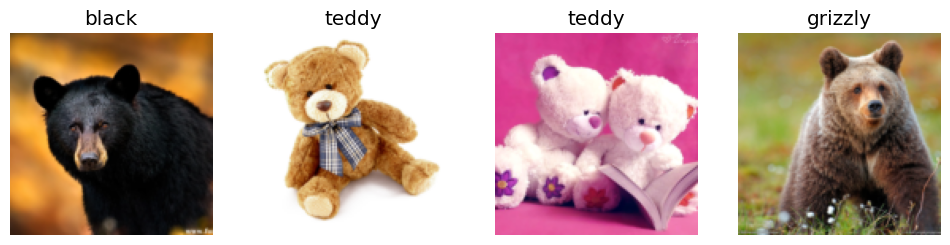

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

默认情况下，`Resize`会利用图像的全宽或全高，通过**裁剪**将图像调整为指定尺寸的正方形。这可能会导致一些重要细节的丢失。此外，你也可以让fastai用零值（黑色）填充图像，或者对图像进行挤压/拉伸处理：

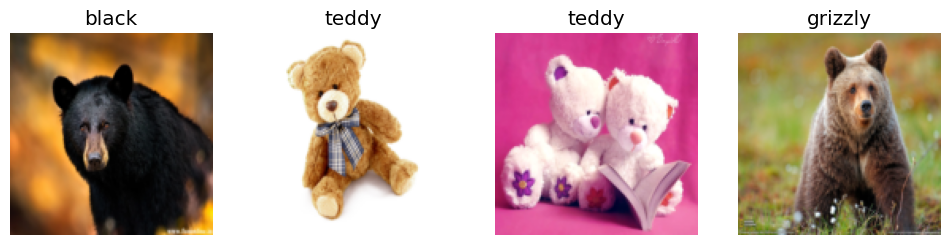

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

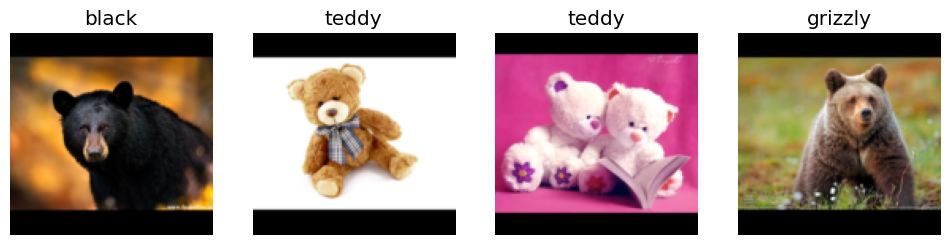

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

所有这些方法似乎都存在一定的浪费或问题。如果我们对图像进行挤压或拉伸，会使图像呈现不自然的形状，导致模型学到的内容与实际情况存在偏差，这很可能会降低模型的准确率。如果我们裁剪图像，可能会去除一些有助于识别的特征。例如，当我们尝试识别猫狗的品种时，可能会不小心裁掉区分相似品种所需的关键身体部位或面部特征。如果我们填充图像，会产生大量空白区域，这对模型而言纯粹是计算资源的浪费，同时也会降低我们实际使用的那部分图像的有效分辨率。

实际上，我们在实践中通常采用的方法是：从图像中随机选取一部分并仅裁剪该部分。在每个轮次（即完整遍历数据集中所有图像一次），我们会为每张图像随机选择不同的部分。这意味着我们的模型能够学习关注并识别图像中的不同特征。这也符合现实世界中图像的特点——同一事物的不同照片可能在构图上略有差异。

事实上，一个完全未经训练的神经网络对图像的特性一无所知。它甚至无法识别：当一个物体旋转1度后，它仍然是同一个物体的图像！因此，用物体位置略有不同、尺寸略有差异的图像样本训练神经网络，能帮助它理解物体的基本概念以及物体在图像中的呈现方式。

下面是另一个示例，我们用`RandomResizedCrop`替换`Resize`，这个变换能实现我们刚才描述的功能。需要传入的最重要参数是`min_scale`，它决定了每次选取的图像部分最小占比：

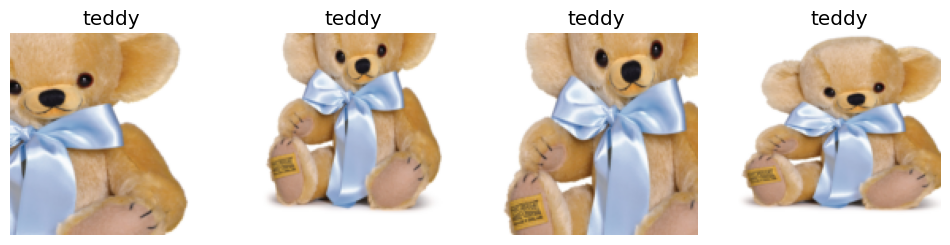

In [11]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

我们使用了`unique=True`参数，让同一张图像通过`RandomResizedCrop`变换生成多个不同版本。这是一种更通用技术的具体示例，这种技术称为数据增强。

### 数据增强

**数据增强**指的是对输入数据创建随机变体，使其看起来不同，但实际上不会改变数据的含义。适用于图像的常见数据增强技术包括旋转、翻转、透视变形、亮度调整和对比度调整等。对于我们这里使用的这类自然照片，`aug_transforms`函数提供了一组经过验证效果不错的标准增强方式。由于我们的图像现在尺寸一致，我们可以利用GPU对整个批次的图像应用这些增强，这将节省大量时间。要告诉fastai我们希望在批次上使用这些变换，需使用`batch_tfms`参数（注意，本例中我们没有使用`RandomResizedCrop`，以便更清晰地看出差异；出于同样原因，我们使用的增强程度是默认值的两倍）：

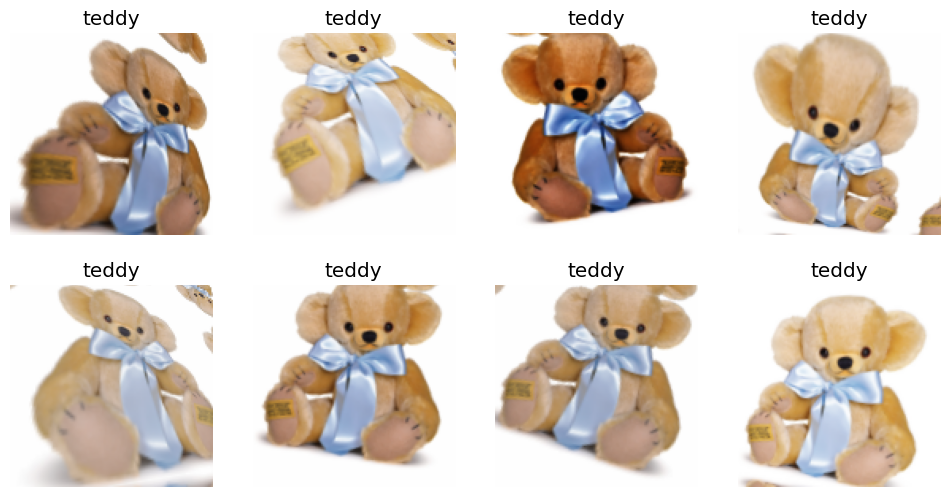

In [12]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

既然我们已经将数据整理成适合模型训练的格式，接下来就让我们用这些数据训练一个图像分类器吧。

## 训练模型并数据清洗

是时候使用与《第一章》中相同的代码行来训练我们的熊分类器了。
我们的问题所用到的数据训练数据并不多（每种种熊最多只有 150 张图片），因此在训练模型时，我们会使用`RandomResizedCrop`将图像尺寸调整为 224 像素（这在图像分类中是相当标准的尺寸），并采用默认的`aug_transforms`：

In [13]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

现在我们可以按照常规方法创建`Learner`并对其进行微调：

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.644200,0.315878,0.148148,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.217659,0.098442,0.024691,00:06
1,0.165905,0.065896,0.024691,00:06
2,0.140470,0.066040,0.037037,00:06
3,0.119259,0.057677,0.037037,00:06
4,0.095288,0.047213,0.024691,00:06
5,0.081183,0.023259,0.012346,00:06
6,0.069571,0.017224,0.012346,00:06
7,0.061626,0.017082,0.012346,00:06
8,0.055582,0.016174,0.012346,00:06
9,0.050126,0.015174,0.012346,00:06


现在我们来看看模型主要会犯哪些错误：是常把灰熊误认为泰迪熊（这对安全来说可不是好事！），还是常把灰熊误认为黑熊，或是其他情况。为了直观呈现这一点，我们可以创建一个**混淆矩阵**：

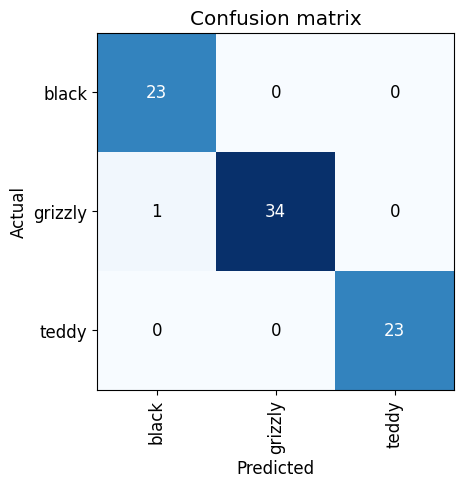

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

矩阵的行分别代表数据集中的黑熊、灰熊和泰迪熊。列则分别代表模型预测为黑熊、灰熊和泰迪熊的图像。因此，矩阵的对角线显示的是分类正确的图像，而非对角线上的单元格则代表分类错误的图像。这是fastai提供的众多模型结果查看方式之一。（当然！）它是基于验证集计算得出的。通过颜色编码，我们希望除对角线为深蓝色外，其他区域都为白色。我们的熊分类器没犯太多错误！

深入了解错误出在哪里很有帮助，这能让我们判断错误是源于数据集问题（例如，图像根本不是熊，或标签标注错误等），还是模型问题（或许模型无法处理光线特殊或角度不同的图像等）。要做到这一点，我们可以按**损失值**对图像进行排序。

损失值是一个数值，若模型分类错误（尤其是对错误答案还很有信心时），或分类正确但对正确答案信心不足时，损失值都会较高。再过几章，我们会深入学习损失值的计算方式及其在训练过程中的作用。目前，`plot_top_losses`会为我们展示数据集中损失值最高的图像。正如输出标题所示，每张图像都标注了四样东西：预测类别、实际类别（目标标签）、损失值和概率。这里的**概率**是模型对其预测结果的置信度，取值范围为0到1：

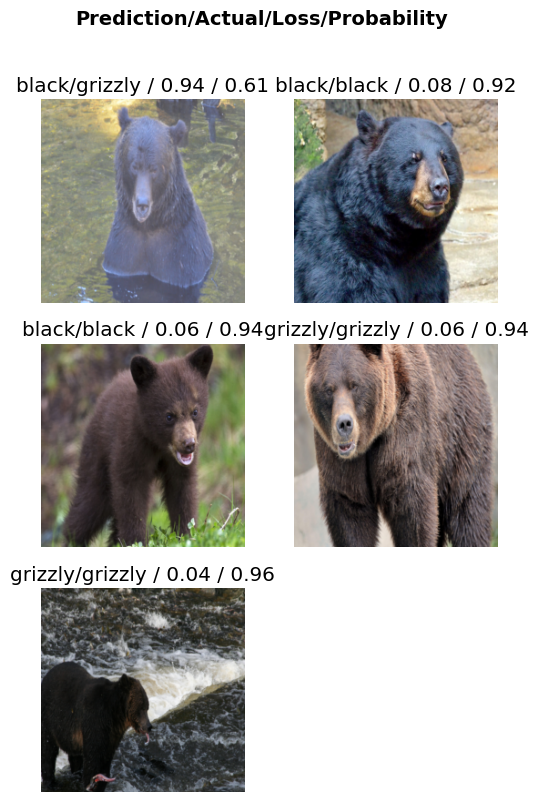

In [26]:
interp.plot_top_losses(5, nrows=3)

输出结果显示，损失值最高的图像被模型以较高置信度预测为“灰熊”，但根据我们的必应图片搜索结果，它被标注为“黑熊”。我们并非熊类专家，但在我们看来，这个标签显然是错误的！或许我们应该将其标签改为“灰熊”。

数据清洗的常规思路是在训练模型**之前**进行。但正如你在这个案例中所见，模型其实能帮助你更快速、更轻松地发现数据问题。因此，我们通常更倾向于先训练一个简单快速的模型，再用它来辅助数据清洗。

fastai包含一个便捷的数据清洗图形界面（GUI），名为`ImageClassifierCleaner`。通过它，你可以选择一个类别，指定查看训练集还是验证集，按顺序浏览损失值最高的图像，还能通过菜单选择图像进行删除或重新标注：

In [27]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

<img alt="Cleaner widget" width="700" src="images/att_00007.png">

In [24]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

我们可以看到，在“黑熊”类别中，有一张图片包含两只熊：一只是灰熊，另一只是黑熊。因此，我们应该在这张图片下方的菜单中选择“\<Delete\>”。`ImageClassifierCleaner`本身并不会实际执行删除或标签修改操作，它只会返回需要修改的项目索引。例如，要删除（`unlink`）所有选中待删除的图像，我们可以运行以下代码：

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

要移动那些我们已为其选择了不同类别的图像，可运行：

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> 西尔万：数据清洗和为模型准备数据是数据科学家面临的两大挑战，据说这两项工作占据了他们90%的时间。fastai库旨在提供工具，让这些工作尽可能变得简单。

在本书中，我们还会看到更多由模型驱动的数据清洗示例。清理完数据后，我们可以重新训练模型。你可以自己尝试一下，看看准确率是否有所提升！

> 注：无需海量数据：通过上述步骤清洗数据集后，我们在这项任务上的准确率通常能达到100%。即便每类熊的图像下载量远少于此处使用的150张，也能得到这样的结果。由此可见，“做深度学习需要海量数据”这一常见说法与事实相去甚远！

既然我们已经训练好了模型，接下来就来看看如何将其部署到实际应用中。

## 将模型转化为在线应用

接下来我们将探讨如何把这个模型转化为一个可运行的在线应用。我们会止步于创建一个基础的可运行原型，因为本书的篇幅无法涵盖 Web 应用开发的所有细节。

### 使用模型进行推理

当你得到一个满意的模型后，需要将其保存，以便复制到生产环境的服务器中使用。请记住，模型由两部分组成：**架构**和经过训练的**参数**。保存模型最简单的方法是同时保存这两部分，因为这样在加载模型时，你可以确保拥有匹配的架构和参数。要同时保存这两部分，请使用`export`方法。

该方法甚至会保存创建`DataLoaders`的定义。这一点很重要，否则在生产环境中使用模型时，你就必须重新定义数据转换方式。fastai默认会自动使用验证集的`DataLoader`进行推理，因此不会应用数据增强，这通常正是你所需要的。

调用`export`时，fastai会保存一个名为“export.pkl”的文件：

In [28]:
learn.export()

我们可以使用fastai为Python的`Path`类添加的`ls`方法来确认这个文件是否存在：

In [29]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

无论将应用部署到何处，都需要用到这个文件。现在，我们先尝试在笔记本中创建一个简单的应用。

当我们使用模型进行预测（而非训练）时，这一过程被称为**推理**。要从导出的文件创建用于推理的学习器，需使用`load_learner`（在当前场景中，这一步其实并非必需，因为我们的笔记本中已经有一个可用的`Learner`了；我们在此处执行这一步，只是为了让你能看到完整的端到端流程）：

In [30]:
learn_inf = load_learner(path/'export.pkl')

在进行推理时，我们通常一次只为单张图像生成预测结果。只需将文件名传入`predict`方法即可实现：

In [31]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([6.0408e-06, 9.9998e-01, 9.9452e-06]))

这返回了三个结果：以你最初提供的格式呈现的预测类别（在本例中是一个字符串）、预测类别的索引，以及每个类别的概率。后两项基于`DataLoaders`的**词汇表**（vocab）中类别的顺序，也就是存储所有可能类别的列表。在推理时，你可以通过`Learner`的属性访问`DataLoaders`：

In [32]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

我们可以看到，如果用`predict`返回的整数去索引词汇表，会得到“灰熊”（grizzly），这与预期一致。此外，观察概率列表可知，该图像被判定为灰熊的概率接近1.00。

我们已经知道如何利用保存的模型进行预测，因此具备了构建应用所需的全部条件。我们可以直接在Jupyter笔记本中实现这一应用。

### 为模型创建一个Jupyter笔记本应用

要在应用中使用我们的模型，只需将`predict`方法当作常规函数来调用即可。因此，借助应用开发者可用的众多框架和技术中的任意一种，都能基于该模型创建应用。

不过，大多数数据科学家并不熟悉Web应用开发领域。所以，我们不妨尝试使用你目前已经有所了解的工具：事实证明，仅依靠Jupyter笔记本就能创建一个完整可用的Web应用！实现这一点需要两个工具：

- IPython widgets（ipywidgets，IPython交互组件）
- Voilà

**IPython交互组件**是一类图形用户界面（GUI）组件，能将JavaScript和Python功能整合到Web浏览器中，且可在Jupyter笔记本内创建和使用。例如，本章前面提到的图像清洗工具就是完全用IPython交互组件编写的。但我们不希望应用的用户自己去运行Jupyter。

这正是**Voilà**存在的意义。它是一个能让基于IPython交互组件的应用对终端用户可用的系统，用户完全无需使用Jupyter。Voilà巧妙利用了这样一个事实：笔记本本身就已经是一种Web应用，只是它相当复杂，还依赖另一个Web应用——Jupyter本身。本质上，Voilà帮助我们自动将已隐含创建的复杂Web应用（即笔记本）转换为一个更简单、更易于部署的Web应用，其功能与普通Web应用无异，而非像笔记本那样运行。

但我们仍能享受在笔记本中开发的便利，借助ipywidgets，可以一步步构建图形界面。我们将采用这种方式创建一个简单的图像分类器。首先，需要一个文件上传组件：

In [30]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" src="images/att_00008.png">

现在我们可以获取这张图像了：

In [33]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [34]:
img = PILImage.create(btn_upload.data[-1])

<img alt="Output widget representing the image" width="117" src="images/att_00009.png">

我们可以使用`Output`组件来显示这张图像：

In [41]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

<img alt="Output widget representing the image" width="117" src="images/att_00009.png">

接下来我们可以获取预测结果：

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

然后我们可以使用`Label`组件来显示这些预测结果：

In [36]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx].item():.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

`Prediction: grizzly; Probability: 1.0000`

我们需要一个按钮来执行分类操作。它的外观和上传按钮完全一样：

In [37]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

我们还需要一个**点击事件处理器**，也就是当按钮被按下时会被调用的函数。我们可以直接复制上面的代码行：

In [38]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

现在你可以点击按钮进行测试，应该能看到图像和预测结果会自动更新！

我们现在可以将所有组件放入一个垂直盒子（`VBox`）中，以完成图形界面的搭建：

In [39]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [42]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

<img alt="The whole widget" width="233" src="images/att_00011.png">

我们已经编写好了应用所需的全部代码。下一步是将其转换为可部署的形式。

### 将Jupyter笔记本转化为实际应用

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

既然我们已经在这个Jupyter笔记本中让所有功能正常运行，就可以着手创建应用了。具体做法是：新建一个笔记本，只添加创建和显示所需组件的代码，以及你希望显示的文本对应的markdown内容。可以参考本书代码仓库中的“bear_classifier”笔记本，看看我们创建的简单笔记本应用是什么样的。

接下来，如果你尚未安装Voilà，请将以下代码行复制到笔记本单元格中并执行：

    !pip install voila
    !jupyter serverextension enable --sys-prefix voila

以`!`开头的单元格不包含Python代码，而是包含要传递给shell（bash、Windows PowerShell等）的代码。如果你熟悉命令行（本书后面会详细讨论），当然也可以直接在终端中输入这两行代码（去掉`!`前缀）。在这里，第一行用于安装`voila`库和应用程序，第二行将其与你现有的Jupyter笔记本关联起来。

Voilà运行Jupyter笔记本的方式，与你现在使用的Jupyter笔记本服务器类似，但它还会做一件非常重要的事：移除所有单元格的输入内容，只显示输出（包括ipywidgets组件）以及markdown单元格。这样一来，剩下的就是一个Web应用了！要将笔记本以Voilà Web应用的形式查看，只需将浏览器URL中的“notebooks”替换为“voila/render”。你会看到与笔记本相同的内容，但不会有任何代码单元格。

当然，你并非一定要使用Voilà或ipywidgets。你的模型本质上就是一个可以调用的函数（`pred,pred_idx,probs = learn.predict(img)`），因此可以将它与任何框架结合使用，部署在任何平台上。而且，你可以先在ipywidgets和Voilà中制作原型，之后再将其转换为常规的Web应用。我们在书中向你展示这种方法，是因为我们认为对于数据科学家和其他非Web开发专家而言，这是一种从模型创建应用的绝佳方式。

现在我们已经有了应用，接下来就进行部署吧！

### 部署你的应用

正如你现在所知，训练几乎所有有用的深度学习模型都需要GPU。那么，在生产环境中使用这个模型时，是否也需要GPU呢？答案是否定的！在生产环境中部署模型时，你几乎肯定**不需要GPU**。原因如下：

- 如前所述，GPU只有在并行处理大量相同任务时才有用。例如，在进行图像分类时，通常一次只需要对一位用户的图像进行分类，而单张图像的处理任务量通常不足以让GPU长时间高效工作。因此，CPU往往更具成本效益。
- 另一种选择是等待几位用户提交图像后，将这些图像批量处理，在GPU上一次性完成。但这样会让用户等待，而无法即时获得结果！而且这种方式只适用于高流量的网站。如果确实需要这种功能，可以使用微软的[ONNX Runtime](https://github.com/microsoft/onnxruntime)或[AWS Sagemaker](https://aws.amazon.com/sagemaker/)等工具。
- 处理GPU推理的复杂性很高。特别是，GPU的内存需要仔细的手动管理，并且需要完善的排队系统以确保一次只处理一个批次。
- CPU服务器市场的竞争远比GPU服务器激烈，因此CPU服务器有更多更便宜的选择。

由于GPU部署的复杂性，许多系统应运而生，试图实现自动化管理。然而，管理和运行这些系统同样复杂，通常需要将模型编译成专门适用于该系统的格式。除非你的应用足够受欢迎，明显值得投入成本，否则通常最好避免这种复杂性。

至少在应用的初始原型阶段，以及对于任何你想展示的个人爱好项目，都可以轻松地免费托管它们。最佳的托管平台和方式会随着时间变化，因此请查看[本书官网](https://book.fast.ai/)以获取最新推荐。在我们2020年初撰写本书时，最简单（且免费）的方法是使用[Binder](https://mybinder.org/)。要在Binder上发布你的Web应用，请按照以下步骤操作：

1. 将你的笔记本添加到[GitHub仓库](http://github.com/)中。
2. 如<\<deploy-binder>\>所示，将该仓库的URL粘贴到Binder的URL输入框中。
3. 将“File”下拉菜单改为选择“URL”。
4. 在“URL to open”字段中，输入`/voila/render/name.ipynb`（将`name`替换为你的笔记本名称）。
5. 点击右下角的剪贴板按钮复制URL，并将其粘贴到安全的地方。
6. 点击“Launch”（启动）。

<img alt="Deploying to Binder" width="800" caption="Deploying to Binder" id="deploy-binder" src="images/att_00001.png">

第一次执行此操作时，Binder大约需要5分钟来构建你的网站。在后台，它会寻找能运行你的应用的虚拟机、分配存储空间、收集运行Jupyter、你的笔记本以及将笔记本呈现为Web应用所需的文件。

最终，当应用启动后，它会自动在你的浏览器中打开这个新的Web应用。你可以分享之前复制的URL，让其他人也能访问你的应用。

关于部署Web应用的其他（包括免费和付费）选项，请务必查看[本书官网](https://book.fast.ai/)。

你很可能希望将应用部署到移动设备或边缘设备（如树莓派）上。有许多库和框架允许你将模型直接集成到移动应用中。然而，这些方法往往需要大量额外步骤和冗余代码，且并非总能支持你的模型可能用到的所有PyTorch和fastai层。此外，你所做的工作还取决于目标部署的移动设备类型——为iOS设备运行可能需要做一些工作，为较新的Android设备则需要不同的工作，为较旧的Android设备又有其他要求，等等。因此，我们建议尽可能将模型本身部署到服务器上，让移动或边缘应用作为Web服务与之连接。

这种方法有不少优势。初始安装更简单，因为你只需部署一个小型图形界面应用，通过连接服务器来完成所有繁重的计算工作。或许更重要的是，核心逻辑的升级可以在服务器端进行，而无需分发给所有用户。服务器的内存和处理能力远胜于大多数边缘设备，且当模型需求增加时，扩展这些资源也容易得多。服务器的硬件通常更标准，能更好地被fastai和PyTorch支持，因此无需将模型编译成其他形式。

当然，这种方法也有缺点。应用需要网络连接，且每次调用模型时都会存在一定延迟。（不过神经网络模型本身运行就需要时间，所以实际中这种额外的网络延迟对用户体验可能影响不大。事实上，由于服务器可以使用更好的硬件，总体延迟甚至可能比在本地运行更低！）另外，如果你的应用涉及敏感数据，用户可能会担心数据被发送到远程服务器，因此有时出于隐私考虑，你需要在边缘设备上运行模型（也可以通过使用本地服务器来避免这种情况，例如部署在公司防火墙内）。管理服务器的复杂性和进行扩展也会带来额外开销，而如果模型在边缘设备上运行，每个用户都自带计算资源，随着用户数量增加，扩展会更轻松（这也称为**水平扩展**）。

> 亚历克西斯：在工作中，我有机会近距离观察移动机器学习领域的变化。我们开发了一款依赖计算机视觉的iPhone应用，多年来，我们一直在云端运行自己的计算机视觉模型。这在当时是唯一可行的方式，因为那些模型需要大量的内存和计算资源，处理输入甚至需要几分钟时间。这种方式不仅需要构建模型（这很有趣！），还得搭建基础设施——确保一定数量的“计算工作机”始终运行（这很棘手）、流量增加时能自动上线更多机器、为大量输入输出提供稳定存储、让iOS应用能够知晓并向用户反馈任务进度等等。如今，苹果提供了相关API，可将模型转换为能在设备上高效运行的形式，而且大多数iOS设备都配备了专用的机器学习硬件，因此对于较新的模型，我们采用了这种策略。这仍然不容易，但对我们而言是值得的——用户体验更快，也不用太操心服务器的问题。实际上，哪种方式适合你，取决于你想打造的用户体验以及你个人觉得哪种方式更容易上手。如果你非常擅长运行服务器，那就用服务器；如果你精通构建原生移动应用，那就用移动应用。通往成功的道路有很多条。

总的来说，我们建议在可能的情况下，尽量采用简单的基于CPU的服务器方式，只要这种方式还能满足需求就一直用下去。如果你的应用足够成功，届时再投入精力采用更复杂的部署方式也不迟。

恭喜你，你已经成功构建了一个深度学习模型并完成了部署！现在，不妨停下来思考一下可能会出现哪些问题。

## 如何规避风险

实际上，深度学习模型往往只是一个更大系统中的一部分。正如本章开头所讨论的，一个数据产品需要考虑从概念构思到生产应用的整个端到端流程。本书无法涵盖管理已部署数据产品的所有复杂性，例如模型多版本管理、A/B测试、金丝雀发布、数据更新（是应该不断扩充数据集，还是定期移除部分旧数据？）、数据标注处理、全程监控、模型退化检测等等。在本节中，我们将概述一些需要重点考虑的问题；若想深入了解部署相关问题，可参考Emmanuel Ameisen所著的《Building Machine Learning Powered Applications》（O'Reilly出版）。

需要重点考虑的问题之一是，理解和测试深度学习模型的行为，比分析你编写的大多数其他代码要困难得多。在常规软件开发中，你可以分析软件执行的精确步骤，并仔细检查这些步骤是否符合你想要实现的预期行为。但对于神经网络而言，其行为是模型为匹配训练数据而“涌现”的结果，而非被明确定义的。

这可能会导致灾难性后果！例如，假设我们真的要推出一个熊类检测系统，将其安装在国家公园营地周围的摄像机上，用于警告露营者有熊靠近。如果我们使用下载的数据集训练模型，在实际应用中会出现各种各样的问题，比如：

- 需处理视频数据而非静态图像
- 应对夜间图像（这类图像可能未包含在数据集中）
- 处理低分辨率摄像机拍摄的图像
- 确保结果返回速度足够快，以在实际场景中发挥作用
- 识别那些在人们发布的照片中很少出现的熊的姿态（例如从后方拍摄的熊、被灌木丛部分遮挡的熊，或距离摄像机很远的熊）

这一问题的很大一部分原因在于，人们最有可能上传到互联网的照片，往往是那些能清晰、美观地展示拍摄主体的照片——但这类照片并非该系统将要处理的输入类型。因此，要打造一个实用的系统，我们可能需要自行大量收集和标注数据。

这只是**域外数据**（out-of-domain data）这一普遍问题的一个例子。也就是说，模型在生产环境中遇到的数据，可能与训练期间见过的数据存在很大差异。这个问题并没有完全技术性的解决方案，相反，我们在推广这项技术时必须谨慎行事。

我们需要谨慎的原因还有很多。一个非常常见的问题是**领域偏移**（domain shift），即模型所处理的数据类型会随时间发生变化。例如，保险公司可能会在定价和风险算法中使用深度学习模型，但随着时间推移，公司吸引的客户类型以及这些客户所代表的风险类型可能发生巨大变化，导致原始训练数据不再适用。

域外数据和领域偏移都属于一个更大的问题：你永远无法完全理解神经网络的全部行为。神经网络的参数数量太多，无法通过分析来掌握其所有可能的行为。这是其最大优势——灵活性——所带来的必然劣势，这种灵活性使神经网络能够解决那些我们甚至可能无法完整明确解决方案的复杂问题。不过好消息是，我们可以通过精心设计的流程来降低这些风险。具体细节会因所解决问题的不同而有所差异，但在此我们将尝试阐述一种高层次的方法（下图总结所求），希望能提供有益的指导。

<img alt="Deployment process" width="500" caption="Deployment process" id="deploy_process" src="images/att_00061.png">

在条件允许的情况下，第一步是采用完全手动的流程，同时让深度学习模型的处理流程并行运行，但不直接用于驱动任何操作。参与手动流程的人员应查看深度学习模型的输出，检查其是否合理。例如，对于我们的熊类分类器，公园护林员可以通过屏幕查看所有摄像机的视频流，而模型识别出的可能有熊出现的画面会被简单地用红色高亮显示。在模型部署后，护林员仍需保持与之前相同的警惕性；此时，模型仅用于辅助排查问题。

第二步是尝试限制模型的应用范围，并安排人员对其进行严密监督。例如，对模型驱动的方案进行小规模、有地理和时间限制的试验。我们不必在全国所有国家公园推广熊类分类器，而是可以选择一个观测点，在一周的时间内进行试验，并且让护林员在每条警报发出前进行核查。

之后，逐步扩大部署范围。在此过程中，务必建立完善的报告系统，确保能及时掌握与手动流程相比，各项操作出现的任何重大变化。例如，如果在某个区域部署新系统后，熊类警报的数量增加了一倍或减少了一半，我们就需要高度警惕。要尽可能设想系统可能出错的各种情况，然后思考哪些指标、报告或图像能够反映这些问题，并确保常规报告中包含这些信息。

> 杰里米：20年前我创办了一家名为“Optimal Decisions”的公司，我们运用机器学习和优化技术，帮助大型保险公司制定定价策略，这关系到数百亿美元的风险。我们采用了这里所描述的方法来管理潜在的风险。此外，在与客户合作将任何方案投入生产环境之前，我们会利用他们前一年的数据对整个端到端系统进行测试，以此模拟方案的影响。将这些新算法投入实际应用的过程总是令人十分紧张，但每一次部署都取得了成功。

### 未预见的后果与反馈循环

在部署模型时，最大的挑战之一是模型可能会改变其所属系统的行为。例如，有一种“预测性警务”算法，它会预测某些社区的犯罪率更高，这会导致更多警察被派往这些社区，进而可能使这些社区记录在案的犯罪数量增多，如此循环往复。在皇家统计学会的论文《To Predict and Serve?》中，克里斯蒂安·卢姆（Kristian Lum）和威廉·艾萨克（William Isaac）指出：“‘预测性警务’这个名称很贴切：它预测的是未来的警务活动，而非未来的犯罪。”

这种情况下的部分问题在于，当存在偏见时（下一章将深入讨论），**反馈循环**可能会让这种偏见的负面影响愈演愈烈。例如，有人担心这种情况已在美国出现——美国的逮捕率存在明显的种族偏见。[美国公民自由联盟（ACLU）的数据显示](https://www.aclu.org/issues/smart-justice/sentencing-reform/war-marijuana-black-and-white)，“尽管大麻的使用率大致相同，但黑人因大麻被捕的概率是白人的3.73倍。” 这种偏见的影响，再加上美国多地部署的预测性警务算法，促使巴里·威廉姆斯（Bärí Williams）在《纽约时报》上[写道](https://www.nytimes.com/2017/12/02/opinion/sunday/intelligent-policing-and-my-innocent-children.html)：“在我的职业生涯中，这项技术带来了诸多兴奋，但它在执法中的应用方式，可能意味着未来几年里，我7岁的儿子仅仅因为他的种族和我们的居住地，就更有可能被定性、逮捕——甚至遭遇更糟的情况，而这一切毫无缘由。”

在部署重要的机器学习系统前，有一个有益的思考练习：“如果它的效果好得超乎想象，会发生什么？” 也就是说，若模型的预测能力极强，且对行为的影响力极大，会出现什么情况？在这种情况下，谁会受到最大影响？可能出现的最极端结果是什么？你如何知晓实际发生了什么？

这样的思考或许能帮助你制定更谨慎的部署计划，包括持续的监控系统和人工监督。当然，若无人听取，人工监督便毫无意义。因此，要确保建立可靠且有韧性的沟通渠道，让合适的人能够知晓问题，并拥有解决问题的权力。

## 开始写作吧！

我们的学生发现，巩固对所学内容理解的最有效方法之一就是把它写下来。检验你对一个主题是否理解的最佳方式，莫过于尝试把它教给别人。即便你从不把写的东西展示给任何人，这个过程也会很有帮助——但如果能分享出去，效果会更好！所以我们建议，如果你还没有博客，那就从现在开始创建一个吧。既然你已经学完了第二章，掌握了训练和部署模型的方法，此时非常适合写第一篇关于你的深度学习之旅的博客文章。在这个过程中，什么让你感到惊讶？你在自己的领域看到了深度学习的哪些机遇？又发现了哪些障碍？

fast.ai的联合创始人蕾切尔·托马斯（Rachel Thomas）在《为什么你（对，就是你）应该写博客》一文中写道：

```asciidoc
____
如果能给年轻时的自己提一条最重要的建议，那就是早点开始写博客。写博客的原因有这些：

- 它就像一份简历，而且更好。我知道有几个人就是因为博客文章获得了工作机会！
- 帮助你学习。梳理知识总能帮我整合自己的想法。检验你是否理解某件事的方法之一，就是看你能否向别人解释清楚。博客文章是实现这一点的绝佳方式。
- 我的博客文章为我带来了参会邀请和演讲邀请。我曾因为一篇吐槽TensorFlow的博客文章，受邀参加了TensorFlow开发者峰会（那次经历太棒了！）。
- 结识新朋友。有好几个人都是因为我写的博客文章而联系我的。
- 节省时间。如果有问题你通过邮件回答了多次，那就把答案写成一篇博客文章，下次再有人问起时，分享起来会更方便。
____
```

或许她最重要的建议是这样的：

> 你最适合帮助那些比你落后一步的人。这些知识在你脑海中还很新鲜。很多专家已经忘了自己当初是初学者（或中级学习者）时的感受，也忘了这个主题在刚接触时为什么难以理解。你特定的背景、独特的风格以及知识水平，都会让你所写的内容呈现出不一样的视角。

## 练习题

1. 请举一个例子，说明由于训练数据在结构或风格上存在差异，熊分类模型可能在生产环境中表现不佳。
2. 文本模型目前存在哪些主要缺陷？
3. 文本生成模型可能带来哪些负面的社会影响？
4. 在模型可能出错且这些错误可能造成危害的情况下，有什么替代自动化流程的好方法？
5. 深度学习特别擅长处理哪种类型的表格数据？
6. 直接使用深度学习模型构建推荐系统的主要缺点是什么？
7. 驱动链方法（Drivetrain Approach）的步骤有哪些？
8. 驱动链方法的步骤如何映射到推荐系统中？
9. 使用你整理的数据创建一个图像识别模型，并将其部署到网络上。
10. 什么是`DataLoaders`？
11. 要创建`DataLoaders`，我们需要告诉fastai哪四件事？
12. `DataBlock`中的`splitter`参数有什么作用？
13. 如何确保随机拆分总能得到相同的验证集？
14. 通常用哪些字母来表示自变量和因变量？
15. 裁剪（crop）、填充（pad）和拉伸（squish）这三种调整大小的方法有什么区别？在什么情况下会选择其中一种而不是其他方法？
16. 什么是数据增强？为什么需要数据增强？
17. `item_tfms`和`batch_tfms`有什么区别？
18. 什么是混淆矩阵？
19. `export`会保存什么？
20. 使用模型进行预测而不是训练的过程叫做什么？
21. 什么是IPython widgets？
22. 什么时候部署时适合使用CPU？什么时候GPU更合适？
23. 将应用部署到服务器而不是客户端（或边缘设备，如手机或电脑）有哪些缺点？
24. 在实际推出熊预警系统时，可能会出现哪些问题？请举三个例子。
25. 什么是“域外数据”（out-of-domain data）？
26. 什么是“领域偏移”（domain shift）？
27. 部署过程的三个步骤是什么？

### 进一步研究

1. 思考驱动链方法（Drivetrain Approach）如何映射到你感兴趣的某个项目或问题上。
2. 在哪些情况下，最好避免使用某些类型的数据增强？
3. 对于一个你有意应用深度学习的项目，做这样一个思想实验：“如果它进展得非常、非常顺利，会发生什么？”